## Import Libraries

In [111]:
import os
import pandas as pd

import psycopg2

## Connect to the DB

In [112]:
# information used to create a database connection
sqluser = 'postgres'
dbname = 'mimic4'
hostname = 'localhost'
port_number = 5434
schema_name = 'omop_cdm'

# Connect to postgres with a copy of the MIMIC-III database
con = psycopg2.connect(dbname=dbname, user=sqluser, host=hostname, port=port_number, password='mysecretpassword')

# the below statement is prepended to queries to ensure they select from the right schema
query_schema = 'set search_path to ' + schema_name + ';'

## Read cohort

In [3]:
cohortQuery = """select * from sepsis_micro.cohort;"""
cohortDf = pd.read_sql_query(cohortQuery, con)
cohortDf

,micro_specimen_id,person_id,chart_time
0,6365708,-327798482,2120-12-02 08:30:00
1,9739471,-547630419,2122-01-20 21:50:00
2,1165358,53482570,2141-04-28 01:00:00
3,9769904,-1046091425,2137-10-15 20:50:00
4,1757513,697543230,2145-12-24 12:00:00
...,...,...,...
25779,9590030,-1745758358,2152-12-06 17:20:00
25780,1337571,-125994228,2202-02-22 17:00:00
25781,5635481,-1722273729,2182-01-17 11:45:00
25782,3230273,809235921,2153-02-25 19:20:00


In [5]:
cohortCountsQuery = """
    select
    count(distinct micro_specimen_id) as micro_specimen_count,
    count(distinct person_id) as person_count
    from
    sepsis_micro.cohort
"""
cohortCountsDf = pd.read_sql_query(cohortCountsQuery, con)
cohortCountsDf.iloc[0, ]

micro_specimen_count    25784
person_count            11329
Name: 0, dtype: int64

In [6]:
cohortCountsDf.iloc[0, ].index

Index(['micro_specimen_count', 'person_count'], dtype='object')

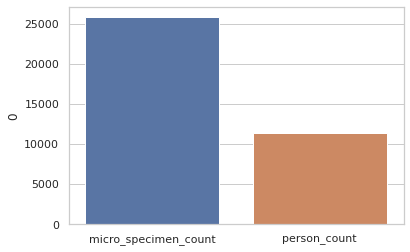

In [7]:
import seaborn as sns

sns.set_theme(style="whitegrid")
ax = sns.barplot(x=cohortCountsDf.iloc[0, ].index, y=cohortCountsDf.iloc[0, ])

## Static data

In [4]:
staticQuery = """select * from sepsis_micro.static;"""
staticDf = pd.read_sql_query(staticQuery, con)
staticDf

,micro_specimen_id,person_id,gender_source_value,visit_occurrence_concept_name,visit_duration_hrs,visit_source_concept_name,admitting_source_value,age
0,9720605,-1912139691,F,Emergency Room - Hospital,142.0,DIRECT EMER.,PHYSICIAN REFERRAL,45.0
1,3976057,-1727642663,F,Emergency Room and Inpatient Visit,148.0,URGENT,TRANSFER FROM HOSPITAL,89.0
2,735457,-1229718441,M,Emergency Room and Inpatient Visit,163.0,URGENT,TRANSFER FROM HOSPITAL,67.0
3,5191616,728812306,F,Emergency Room and Inpatient Visit,268.0,URGENT,TRANSFER FROM HOSPITAL,80.0
4,3954993,-1654847942,M,Emergency Room and Inpatient Visit,358.0,URGENT,TRANSFER FROM HOSPITAL,55.0
...,...,...,...,...,...,...,...,...
24267,2649012,-954369712,F,Emergency Room - Hospital,27.0,EW EMER.,EMERGENCY ROOM,50.0
24268,5662604,-954369712,F,Emergency Room - Hospital,359.0,EW EMER.,EMERGENCY ROOM,47.0
24269,6122161,-954369712,F,Emergency Room - Hospital,170.0,EW EMER.,EMERGENCY ROOM,47.0
24270,6126875,-954369712,F,Emergency Room - Hospital,169.0,EW EMER.,EMERGENCY ROOM,48.0


### Visit duration

Text(0, 0.5, 'Count')

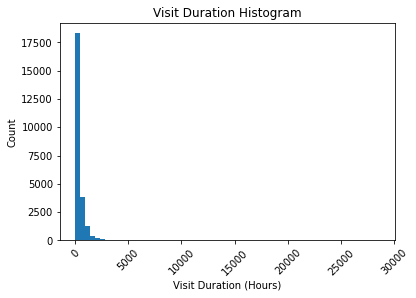

In [5]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
plt.xticks(rotation = 45)
plt.hist(staticDf.visit_duration_hrs, bins=60)

ax.set_title('Visit Duration Histogram')
ax.set_xlabel('Visit Duration (Hours)')
ax.set_ylabel('Count')

In [8]:
staticDf.visit_duration_hrs

0        142.0
1        148.0
2        163.0
3        268.0
4        358.0
         ...  
24267     27.0
24268    359.0
24269    170.0
24270    169.0
24271     27.0
Name: visit_duration_hrs, Length: 24272, dtype: float64

Text(0, 0.5, 'Count')

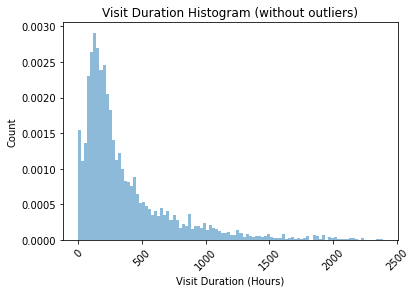

In [17]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
plt.xticks(rotation = 45)
plt.hist(
    staticDf[
        staticDf.visit_duration_hrs.sub(staticDf.visit_duration_hrs.mean()).div(staticDf.visit_duration_hrs.std()).abs().le(3)
    ].visit_duration_hrs
    , density=True
    , bins=100
    , alpha=0.5
)

ax.set_title('Visit Duration Histogram (without outliers)')
ax.set_xlabel('Visit Duration (Hours)')
ax.set_ylabel('Count')

### Visit distribution

Text(0.5, 0, 'Visit')

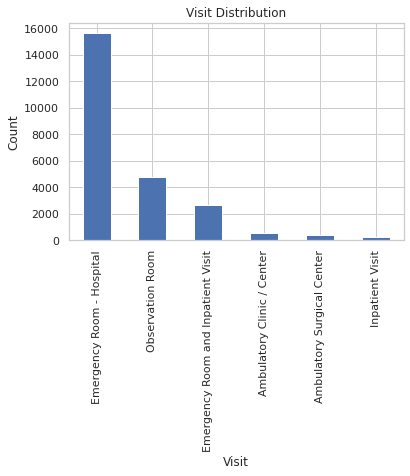

In [10]:
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
staticDf.visit_occurrence_concept_name.value_counts().plot(kind='bar')

ax.set_title('Visit Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Visit')

### Visit source distribution

Text(0.5, 0, 'Visit Source')

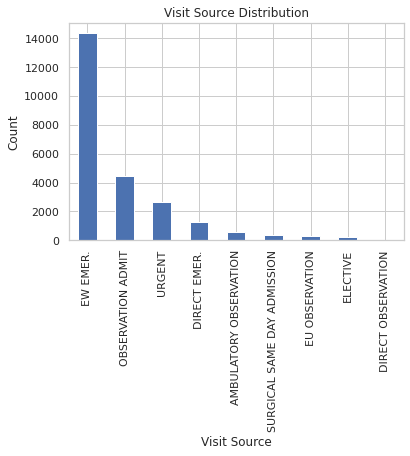

In [11]:
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
staticDf.visit_source_concept_name.value_counts().plot(kind='bar')

ax.set_title('Visit Source Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Visit Source')

### Admitting source distribution

Text(0.5, 0, 'Admitting Source')

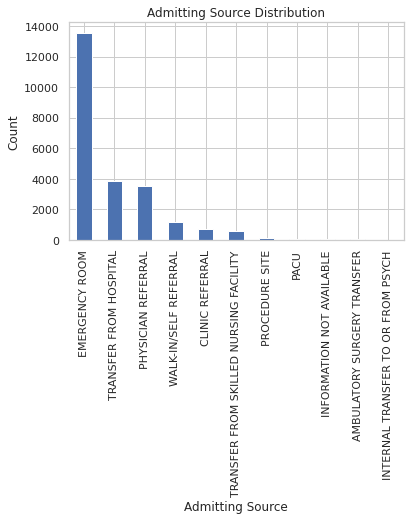

In [12]:
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
staticDf.admitting_source_value.value_counts().plot(kind='bar')

ax.set_title('Admitting Source Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Admitting Source')

## Vitals data

In [13]:
vitalsQuery = """select * from sepsis_micro.vitals;"""
vitalsDf = pd.read_sql_query(vitalsQuery, con)
vitalsDf

,micro_specimen_id,person_id,measurement_datetime,unit_source_value,value_as_number,concept_name,rn
0,1247618,-2144679073,2194-04-08 23:00:00,°F,94.4,Body temperature,1
1,9734522,-2144679073,2194-04-08 23:00:00,°F,94.4,Body temperature,2
2,1247618,-2144679073,2194-04-09 01:00:00,°F,97.8,Body temperature,3
3,9734522,-2144679073,2194-04-09 01:00:00,°F,97.8,Body temperature,4
4,1247618,-2144679073,2194-04-09 04:00:00,°F,97.3,Body temperature,5
...,...,...,...,...,...,...,...
4205215,647143,2146343948,2161-04-07 08:01:00,mmHg,113.0,Systolic blood pressure by Noninvasive,8
4205216,647143,2146343948,2161-04-07 09:01:00,mmHg,129.0,Systolic blood pressure by Noninvasive,9
4205217,647143,2146343948,2161-04-07 10:01:00,mmHg,105.0,Systolic blood pressure by Noninvasive,10
4205218,647143,2146343948,2161-04-07 12:01:00,mmHg,122.0,Systolic blood pressure by Noninvasive,11


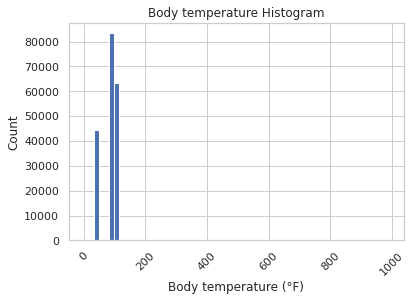

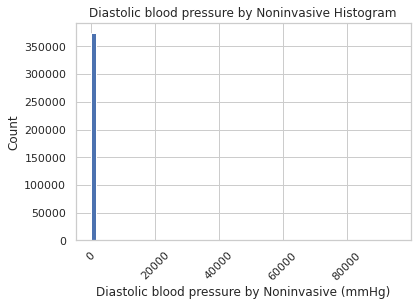

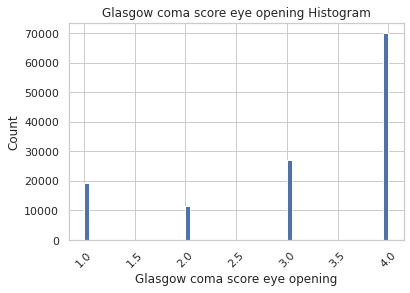

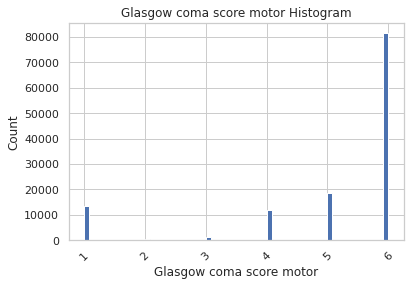

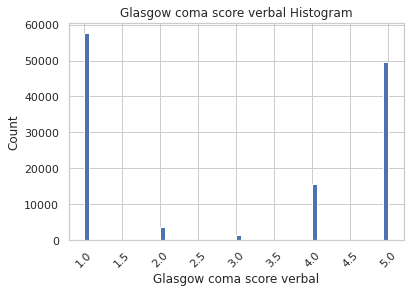

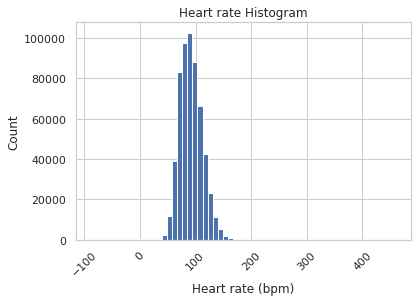

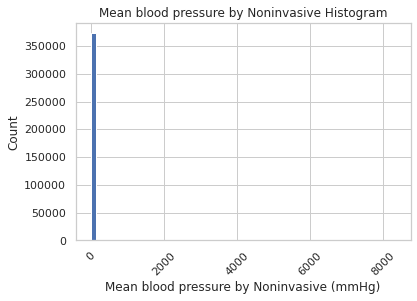

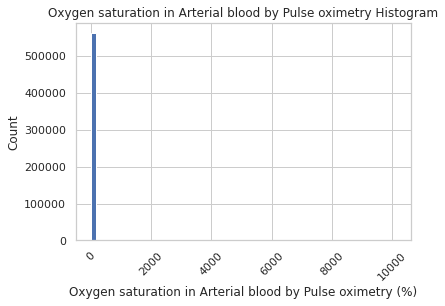

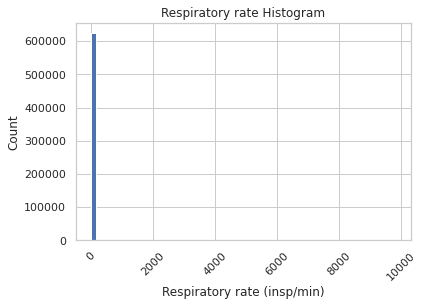

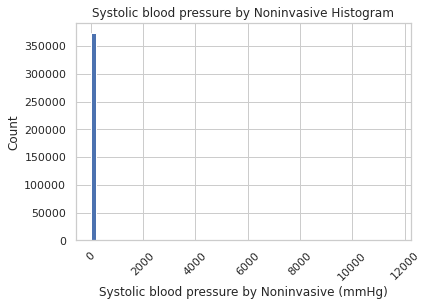

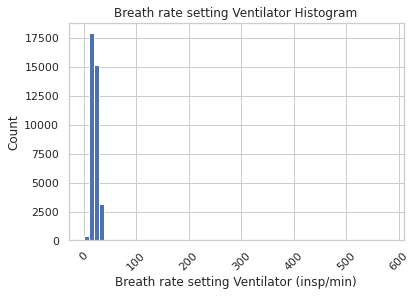

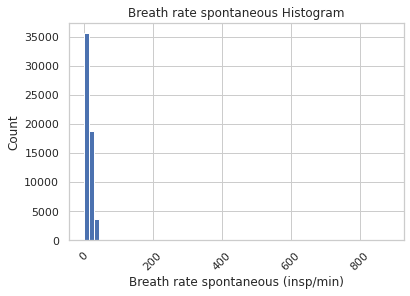

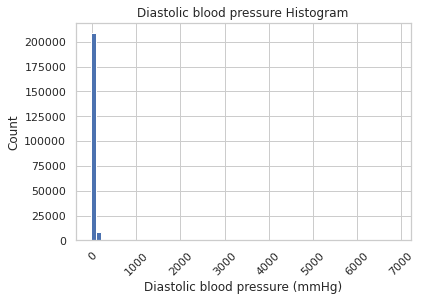

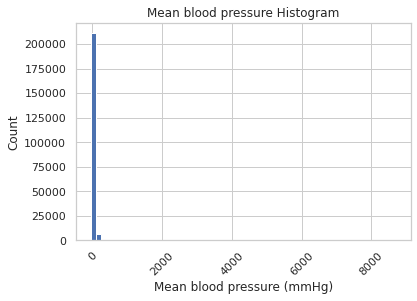

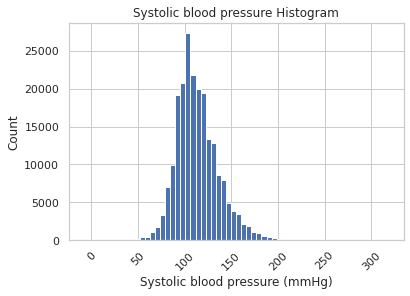

In [14]:
vitalsNames = vitalsDf.concept_name.unique()

for v in vitalsNames:

    fig, ax = plt.subplots()
    plt.xticks(rotation = 45)
    plt.hist(vitalsDf[vitalsDf.concept_name == v].value_as_number, bins=60)

    unit = vitalsDf[vitalsDf.concept_name == v].unit_source_value.tolist()[0]
    unit = (' (' + unit + ')') if unit else ''
    ax.set_title(v + ' Histogram')
    ax.set_xlabel(v + unit)
    ax.set_ylabel('Count')

## Laboratory Measurements

In [15]:
labsQuery = """select * from sepsis_micro.lab_measurements;"""
labsDf = pd.read_sql_query(labsQuery, con)
labsDf

,micro_specimen_id,person_id,measurement_datetime,unit_source_value,value_as_number,concept_name,rn
0,9734522,-2144679073,2194-04-08 22:48:00,mEq/L,13.0,Bicarbonate [Moles/volume] in Serum or Plasma,1
1,1247618,-2144679073,2194-04-08 22:48:00,mEq/L,13.0,Bicarbonate [Moles/volume] in Serum or Plasma,2
2,9734522,-2144679073,2194-04-09 11:05:00,mEq/L,20.0,Bicarbonate [Moles/volume] in Serum or Plasma,3
3,1247618,-2144679073,2194-04-09 11:05:00,mEq/L,20.0,Bicarbonate [Moles/volume] in Serum or Plasma,4
4,1247618,-2144679073,2194-04-10 04:13:00,mEq/L,20.0,Bicarbonate [Moles/volume] in Serum or Plasma,5
...,...,...,...,...,...,...,...
378858,8863285,2146653386,2149-03-13 04:31:00,g/dl,13.3,Hemoglobin [Mass/volume] in Blood,2
378859,8863285,2146653386,2149-03-13 01:32:00,mEq/L,4.1,Potassium [Moles/volume] in Serum or Plasma,1
378860,8863285,2146653386,2149-03-13 04:31:00,mEq/L,3.8,Potassium [Moles/volume] in Serum or Plasma,2
378861,8863285,2146653386,2149-03-13 01:32:00,mEq/L,137.0,Sodium [Moles/volume] in Serum or Plasma,1


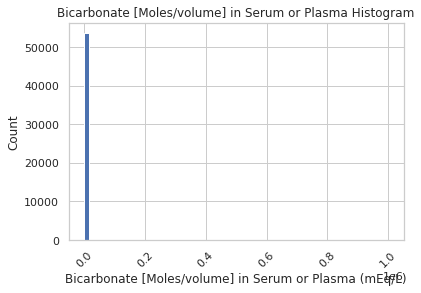

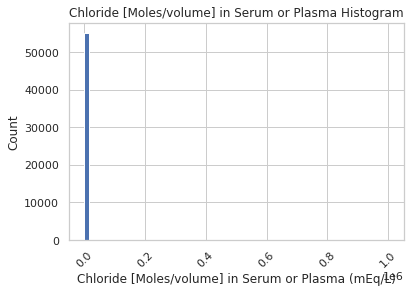

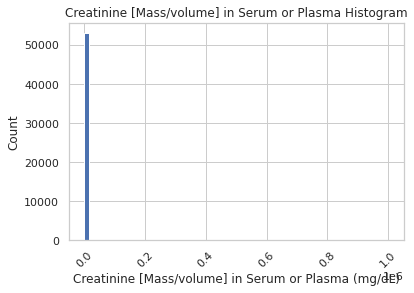

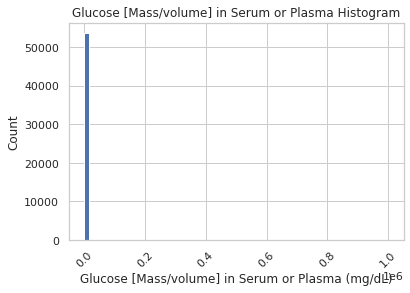

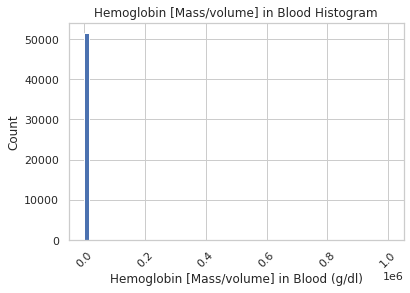

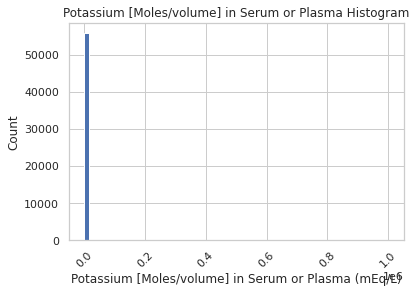

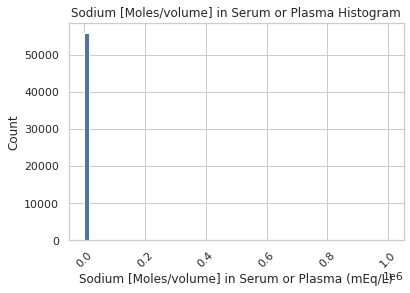

In [16]:
labsNames = labsDf.concept_name.unique()

for v in labsNames:

    fig, ax = plt.subplots()
    plt.xticks(rotation = 45)
    plt.hist(labsDf[labsDf.concept_name == v].value_as_number, bins=60)

    unit = labsDf[labsDf.concept_name == v].unit_source_value.tolist()[0]
    unit = (' (' + unit + ')') if unit else ''
    ax.set_title(v + ' Histogram')
    ax.set_xlabel(v + unit)
    ax.set_ylabel('Count')

## Mortality Data

In [36]:
mortalityQuery = """select * from sepsis_micro.mortality;"""
mortalityDf = pd.read_sql_query(mortalityQuery, con)
mortalityDf

,micro_specimen_id,person_id,seven_day_mortality,fourteen_day_mortality,twentyone_day_mortality,twentyeight_day_mortality,sixty_day_mortality,ninety_day_mortality,onetwenty_day_mortality
0,6365708,-327798482,False,False,False,False,False,False,False
1,9739471,-547630419,False,False,False,False,False,False,False
2,1165358,53482570,False,False,False,False,False,False,False
3,9769904,-1046091425,False,False,False,False,False,False,False
4,1757513,697543230,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
25779,9590030,-1745758358,False,False,False,False,False,False,False
25780,1337571,-125994228,False,False,False,False,False,False,False
25781,5635481,-1722273729,True,True,True,True,True,True,True
25782,3230273,809235921,False,False,False,False,False,False,False


In [37]:
mortalityData = []
mortalityData.append(['Seven Day Mortality', mortalityDf.seven_day_mortality.sum()])
mortalityData.append(['Fourteen Day Mortality', mortalityDf.fourteen_day_mortality.sum()])
mortalityData.append(['Twentyone Day Mortality', mortalityDf.twentyone_day_mortality.sum()])
mortalityData.append(['Twentyeight Day Mortality', mortalityDf.twentyeight_day_mortality.sum()])
mortalityData.append(['Sixty Day Mortality', mortalityDf.sixty_day_mortality.sum()])
mortalityData.append(['Ninety Day Mortality', mortalityDf.ninety_day_mortality.sum()])
mortalityData.append(['Onetwenty Day Mortality', mortalityDf.onetwenty_day_mortality.sum()])

In [38]:
plotDf = pd.DataFrame(mortalityData, columns=["mortality_class", "cnt"])
plotDf

,mortality_class,cnt
0,Seven Day Mortality,1780
1,Fourteen Day Mortality,2571
2,Twentyone Day Mortality,2979
3,Twentyeight Day Mortality,3248
4,Sixty Day Mortality,3780
5,Ninety Day Mortality,4017
6,Onetwenty Day Mortality,4179


Text(0.5, 0, 'Mortality Class')

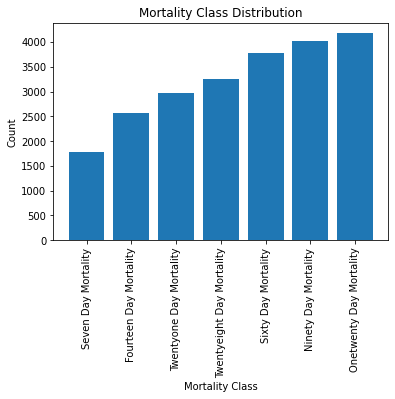

In [39]:
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
plt.bar(x=plotDf.mortality_class, height=plotDf.cnt)

ax.set_title('Mortality Class Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Mortality Class')

## Time-To-Antibiotic

In [19]:
ttaQuery = """select * from sepsis_micro.time_to_antibiotic;"""
ttaDf = pd.read_sql_query(ttaQuery, con)
ttaDf

,micro_specimen_id,time_to_antibiotic
0,271,-1320.0
1,2940,0.0
2,3236,0.0
3,3437,-172.0
4,3653,5.0
...,...,...
16663,9996944,-13.0
16664,9997513,18.0
16665,9998398,556.0
16666,9998453,-22.0


In [20]:
ttaDf.time_to_antibiotic.describe()

count    16668.000000
mean       708.727142
std      11515.042009
min     -98629.000000
25%         -2.000000
50%          8.000000
75%         66.250000
max      95684.000000
Name: time_to_antibiotic, dtype: float64

Text(0, 0.5, 'Count')

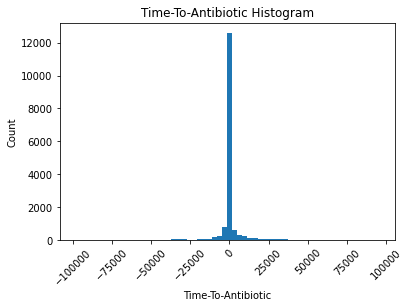

In [21]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
plt.xticks(rotation = 45)
plt.hist(ttaDf.time_to_antibiotic, bins=60)

ax.set_title('Time-To-Antibiotic Histogram')
ax.set_xlabel('Time-To-Antibiotic')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

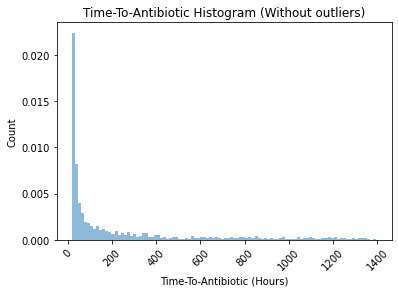

In [35]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
plt.xticks(rotation = 45)
plt.hist(
    ttaDf[
        ttaDf.time_to_antibiotic.sub(ttaDf.time_to_antibiotic.mean()).div(ttaDf.time_to_antibiotic.std()).abs().le(0.06)
    ].time_to_antibiotic
    , density=True
    , bins=100
    , alpha=0.5
)
# plt.hist(ttaDf.time_to_antibiotic, bins=60)

ax.set_title('Time-To-Antibiotic Histogram (Without outliers)')
ax.set_xlabel('Time-To-Antibiotic (Hours)')
ax.set_ylabel('Count')

## Combine visit duration and time to antibiotic with mortality dataframe

In [82]:
from functools import reduce

dataFrames = [staticDf, mortalityDf, ttaDf]
mergedDf = reduce(lambda left, right: pd.merge(left, right, on=['micro_specimen_id'], how='inner'), dataFrames)
mergedDf

,micro_specimen_id,person_id_x,gender_source_value,visit_occurrence_concept_name,visit_duration_hrs,visit_source_concept_name,admitting_source_value,age,person_id_y,seven_day_mortality,fourteen_day_mortality,twentyone_day_mortality,twentyeight_day_mortality,sixty_day_mortality,ninety_day_mortality,onetwenty_day_mortality,time_to_antibiotic
0,9720605,-1912139691,F,Emergency Room - Hospital,142.0,DIRECT EMER.,PHYSICIAN REFERRAL,45.0,-1912139691,False,False,False,False,False,False,False,-35395.0
1,735457,-1229718441,M,Emergency Room and Inpatient Visit,163.0,URGENT,TRANSFER FROM HOSPITAL,67.0,-1229718441,False,False,False,False,False,False,False,-5581.0
2,5191616,728812306,F,Emergency Room and Inpatient Visit,268.0,URGENT,TRANSFER FROM HOSPITAL,80.0,728812306,False,True,True,True,True,True,True,0.0
3,3954993,-1654847942,M,Emergency Room and Inpatient Visit,358.0,URGENT,TRANSFER FROM HOSPITAL,55.0,-1654847942,False,False,False,False,False,False,False,28963.0
4,53771,-1654847942,M,Emergency Room and Inpatient Visit,358.0,URGENT,TRANSFER FROM HOSPITAL,55.0,-1654847942,False,False,False,False,False,False,False,28964.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,2649012,-954369712,F,Emergency Room - Hospital,27.0,EW EMER.,EMERGENCY ROOM,50.0,-954369712,True,True,True,True,True,True,True,6.0
15886,5662604,-954369712,F,Emergency Room - Hospital,359.0,EW EMER.,EMERGENCY ROOM,47.0,-954369712,False,False,False,False,False,False,False,8.0
15887,6122161,-954369712,F,Emergency Room - Hospital,170.0,EW EMER.,EMERGENCY ROOM,47.0,-954369712,False,False,False,False,False,False,False,7.0
15888,6126875,-954369712,F,Emergency Room - Hospital,169.0,EW EMER.,EMERGENCY ROOM,48.0,-954369712,False,False,False,False,False,False,False,656.0


Text(0, 0.5, 'Proportion')

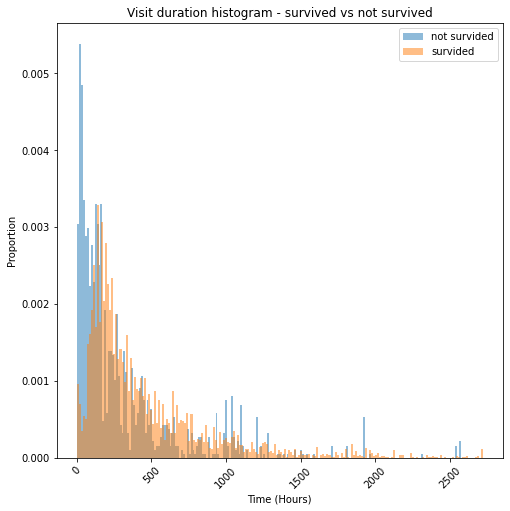

In [83]:
from matplotlib import pyplot as plt

plotDf = mergedDf[mergedDf.visit_duration_hrs.sub(mergedDf.visit_duration_hrs.mean()).div(mergedDf.visit_duration_hrs.std()).abs().le(3)]

fig, ax = plt.subplots(figsize=(8, 8))
plt.xticks(rotation = 45)
plt.hist(plotDf[plotDf.seven_day_mortality].visit_duration_hrs, density=True, bins=200, alpha=0.5, label='not survided')
plt.hist(plotDf[~plotDf.seven_day_mortality].visit_duration_hrs, density=True, bins=200, alpha=0.5, label='survided')

plt.legend(loc='upper right')

ax.set_title('Visit duration histogram - survived vs not survived')
ax.set_xlabel('Time (Hours)')
ax.set_ylabel('Proportion')


/superbugai-data/yash/chapter_1/workspace/ML/mortality/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/superbugai-data/yash/chapter_1/workspace/ML/mortality/.venv/lib/python3.9/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


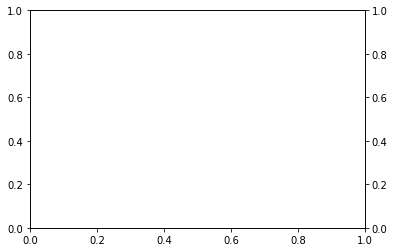

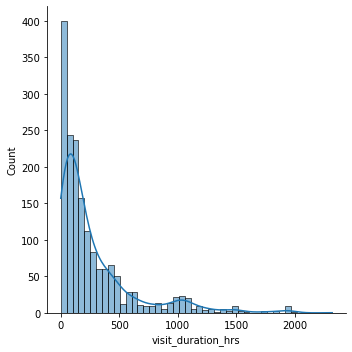

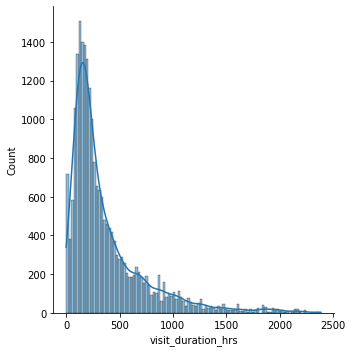

In [69]:
import seaborn as sns

fig, ax = plt.subplots()
sns.displot(x=plotDf[plotDf.seven_day_mortality].visit_duration_hrs, kde=True, ax=ax)
ax2 = ax.twinx()
sns.displot(x=plotDf[~plotDf.seven_day_mortality].visit_duration_hrs, kde=True, ax=ax2)

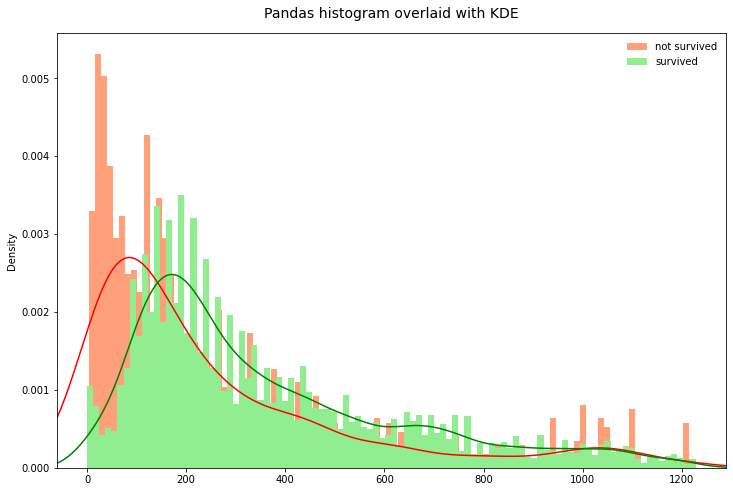

In [102]:
# Plot pandas histogram from dataframe with df.plot.hist (not df.hist)
# plotDf[plotDf.seven_day_mortality].visit_duration_hrs

plotDf = mergedDf[mergedDf.visit_duration_hrs.sub(mergedDf.visit_duration_hrs.mean()).div(mergedDf.visit_duration_hrs.std()).abs().le(1)]

fig, ax = plt.subplots(figsize=(12, 8))

ax = plotDf[plotDf.seven_day_mortality].visit_duration_hrs.plot.hist(bins=100, density=True, color='lightsalmon', linewidth=0.5)
ax = plotDf[~plotDf.seven_day_mortality].visit_duration_hrs.plot.hist(bins=100, density=True, color='lightgreen', linewidth=0.5)

# Save default x-axis limits for final formatting because the pandas kde
# plot uses much wider limits which usually decreases readability
xlim = ax.get_xlim()

# Plot pandas KDE
plotDf[plotDf.seven_day_mortality].visit_duration_hrs.plot.density(color='red', alpha=1, ax=ax) # same as df['var'].plot.kde()
plotDf[~plotDf.seven_day_mortality].visit_duration_hrs.plot.density(color='green', alpha=1, ax=ax) # same as df['var'].plot.kde()

# Reset x-axis limits and edit legend and add title
ax.set_xlim(xlim)
ax.legend(labels=['not survived', 'survived'], frameon=False)
ax.set_title('Pandas histogram overlaid with KDE', fontsize=14, pad=15)

plt.show()

In [100]:
plotDf[~plotDf.seven_day_mortality].visit_duration_hrs.describe()

count    14270.000000
mean       440.657744
std        421.266484
min          0.000000
25%        168.000000
50%        289.000000
75%        572.000000
max       2719.000000
Name: visit_duration_hrs, dtype: float64

In [99]:
plotDf[plotDf.seven_day_mortality].visit_duration_hrs.describe()

count    1459.000000
mean      307.790267
std       387.206254
min         4.000000
25%        68.000000
50%       160.000000
75%       383.000000
max      2574.000000
Name: visit_duration_hrs, dtype: float64

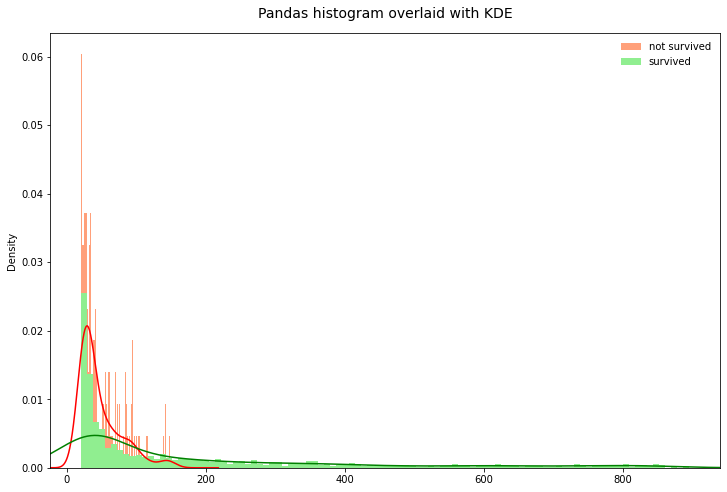

In [110]:
# Plot pandas histogram from dataframe with df.plot.hist (not df.hist)
# plotDf[plotDf.seven_day_mortality].visit_duration_hrs

plotDf = mergedDf[mergedDf.time_to_antibiotic.sub(mergedDf.time_to_antibiotic.mean()).div(mergedDf.time_to_antibiotic.std()).abs().le(0.04)]

fig, ax = plt.subplots(figsize=(12, 8))

ax = plotDf[plotDf.seven_day_mortality].time_to_antibiotic.plot.hist(bins=100, density=True, color='lightsalmon', linewidth=0.5)
ax = plotDf[~plotDf.seven_day_mortality].time_to_antibiotic.plot.hist(bins=100, density=True, color='lightgreen', linewidth=0.5)

# Save default x-axis limits for final formatting because the pandas kde
# plot uses much wider limits which usually decreases readability
xlim = ax.get_xlim()

# Plot pandas KDE
plotDf[plotDf.seven_day_mortality].time_to_antibiotic.plot.density(color='red', alpha=1, ax=ax) # same as df['var'].plot.kde()
plotDf[~plotDf.seven_day_mortality].time_to_antibiotic.plot.density(color='green', alpha=1, ax=ax) # same as df['var'].plot.kde()

# Reset x-axis limits and edit legend and add title
ax.set_xlim(xlim)
ax.legend(labels=['not survived', 'survived'], frameon=False)
ax.set_title('Pandas histogram overlaid with KDE', fontsize=14, pad=15)

plt.show()

## Data Counts

In [215]:
countsQuery = """
    with stg1 as
    (
        select
        micro_specimen_id
        , subject_id
        , hadm_id
        from
        mimiciv.microbiologyevents
        where
        spec_type_desc = 'BLOOD CULTURE'
        and org_itemid != 90760
        and org_name is not null
        group by subject_id, micro_specimen_id, hadm_id
    )
    select
    count(distinct dm.micro_specimen_id) as micro_specimen_count,
    count(distinct dm.person_id) as person_count,
    count(distinct ad.hadm_id) as admission_count,
    count(distinct ic.stay_id) as icu_count,
    count(ad.hadm_id) as total_admission_count,
    count(ic.stay_id) as total_icu_count
    from
    sepsis_vb_48_va_0_lb_48_la_0.data_matrix_qc dm
    left join omop_cdm.person pe
    on pe.person_id = dm.person_id
    left join stg1 s1
    on s1.micro_specimen_id = dm.micro_specimen_id and s1.subject_id = pe.person_source_value::int
    left join sepsis_vb_48_va_0_lb_48_la_0.cohort co
    on co.micro_specimen_id = dm.micro_specimen_id and co.person_id = dm.person_id
    left join mimiciv.patients pa
    on pa.subject_id = pe.person_source_value::int
    left join mimiciv.admissions ad
    on ad.subject_id = pa.subject_id and co.chart_time BETWEEN (ad.admittime - INTERVAL '3 DAY') AND (ad.dischtime + INTERVAL '3 DAY')
    left join mimiciv.icustays ic
    on ic.hadm_id = ad.hadm_id
    ;
"""

In [216]:
countsDf = pd.read_sql_query(countsQuery, con)
countsDf.iloc[0, ]

micro_specimen_count     7339
person_count             3730
admission_count          4149
icu_count                5056
total_admission_count    9774
total_icu_count          9661
Name: 0, dtype: int64

<BarContainer object of 6 artists>

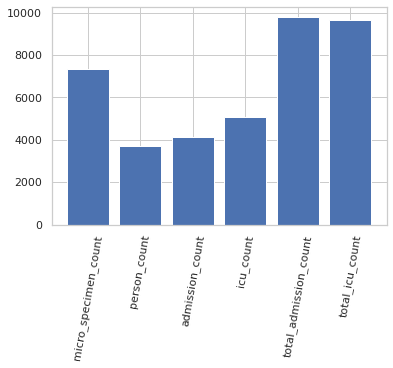

In [217]:
from matplotlib import pyplot as plt

plt.xticks(rotation = 80)
plt.bar(x=countsDf.iloc[0, ].index, height=countsDf.iloc[0, ])

## Survived vs Non Survived

In [198]:
survivedCountsQuery = """
    select
    sum(case when death_datetime is null then 1 else 0 end) as survived_count,
    sum(case when death_datetime is not null then 1 else 0 end) as not_survived_count
    from
    sepsis_vb_48_va_0_lb_48_la_0.data_matrix_qc
"""

survivedCountsDf = pd.read_sql_query(survivedCountsQuery, con)
survivedCountsDf.iloc[0, ]

survived_count        4855
not_survived_count    2484
Name: 0, dtype: int64

([<matplotlib.patches.Wedge at 0x7f9df2881d90>,
 [Text(-0.534569034104543, 0.9613719091883932, 'survived_count'),
  Text(0.5345689440944064, -0.9613719592383541, 'not_survived_count')])

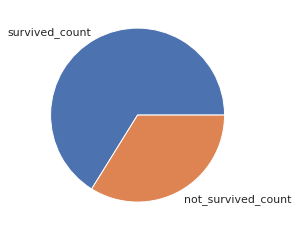

In [199]:
from matplotlib import pyplot as plt

plt.pie(labels=survivedCountsDf.iloc[0, ].index, x=survivedCountsDf.iloc[0, ])

## Mortality (Target) Counts

In [200]:
deathTimeQuery = """
    select
    dm.death_datetime,
    co.chart_time,
    DATE_PART('day', (dm.death_datetime - co.chart_time)) as duration
    from
    sepsis_vb_48_va_0_lb_48_la_0.data_matrix_qc dm
    inner join sepsis_vb_48_va_0_lb_48_la_0.cohort co
    on co.micro_specimen_id = dm.micro_specimen_id and co.person_id = dm.person_id
    where dm.death_datetime is not null
    ;
"""

deathTimeDf = pd.read_sql_query(deathTimeQuery, con)
deathTimeDf

,death_datetime,chart_time,duration
0,2147-01-07 08:30:00,2145-12-24 20:37:00,378.0
1,2147-01-07 08:30:00,2145-12-24 20:45:00,378.0
2,2181-05-22 11:53:00,2181-05-19 14:37:00,2.0
3,2181-05-22 11:53:00,2181-04-18 10:41:00,34.0
4,2161-01-28 01:27:00,2161-01-26 07:55:00,1.0
...,...,...,...
2479,2138-09-24 12:04:00,2138-04-19 12:45:00,157.0
2480,2138-09-24 12:04:00,2138-09-21 05:02:00,3.0
2481,2185-01-12 19:45:00,2185-01-02 20:40:00,9.0
2482,2185-01-12 19:45:00,2181-02-04 10:20:00,1438.0


(array([400., 226., 130.,  99.,  66.,  53.,  27.,  27.,  19.,  11.,  14.,
          7.,  17.,  15.,  20.,   8.,   6.,   1.,  13.,  11.,   3.,  10.,
          4.]),
 array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
         70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120]),
 <BarContainer object of 23 artists>)

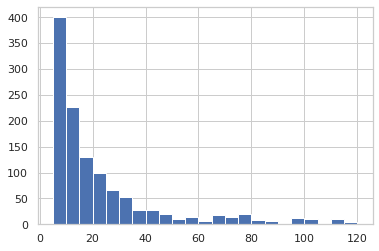

In [201]:
from matplotlib import pyplot as plt

plt.hist(deathTimeDf.duration, bins=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, ])

(array([411., 192., 141., 151.,  73.,  42.]),
 array([  7,  14,  21,  30,  60,  90, 120]),
 <BarContainer object of 6 artists>)

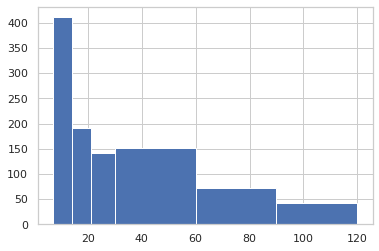

In [202]:
from matplotlib import pyplot as plt

plt.hist(deathTimeDf.duration, bins=[7, 14, 21, 30, 60, 90, 120, ])

## Admit time to Time zero counts

In [226]:
admitTimeQuery = """
    select 
    extract(epoch from (co.chart_time - ad.admittime))/3600 as duration
    from
    sepsis_vb_48_va_0_lb_48_la_0.cohort co
    inner join sepsis_vb_48_va_0_lb_48_la_0.data_matrix_qc dm
    on dm.person_id = co.person_id and dm.micro_specimen_id = co.micro_specimen_id
    inner join omop_cdm.person pe
    on pe.person_id = co.person_id
    inner join mimiciv.patients pa
    on pa.subject_id = pe.person_source_value::int
    inner join mimiciv.admissions ad
    on ad.subject_id = pa.subject_id and co.chart_time BETWEEN (ad.admittime - INTERVAL '5 DAY') AND (ad.dischtime + INTERVAL '5 DAY')
    ;
"""

admitTimeDf = pd.read_sql_query(admitTimeQuery, con)
admitTimeDf

,duration
0,-1.916667
1,-1.750000
2,-5.450000
3,-2.816667
4,495.566667
...,...
7647,-0.650000
7648,230.483333
7649,-4.683333
7650,205.966667


In [227]:
min(admitTimeDf.duration)

-119.56666666666666

In [228]:
max(admitTimeDf.duration)

21310.316666666666

(array([  16.,    8.,    6.,    9., 3016., 1165.,  514.,  384.,  276.,
         238.]),
 array([-120,  -96,  -72,  -48,  -24,    0,   24,   48,   72,   96,  120]),
 <BarContainer object of 10 artists>)

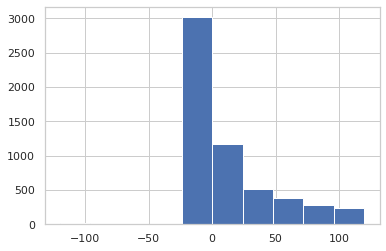

In [229]:
from matplotlib import pyplot as plt

plt.hist(admitTimeDf.duration, bins=[-120, -96, -72, -48, -24, 0, 24, 48, 72, 96, 120, ])